In this chapter, we deal with the following

- Basic inheritance
- Inheriting from built-in types
- Multiple inheritance
- Polymorphism and duck typing

__Basic Inheritance__

Technically, every class we create uses inheritance. This classes are usually subclasses of the special built-in class named __object__. 

In [1]:
class Contact:
    all_contacts = []
    
    def __init__(self, name, email):
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)

In [15]:
class Supplier(Contact):
    def order(self, order):
        print('If this were a real system we would send'
              f'{order}order to {self.name}')

In [3]:
c = Contact('Some body', 'somebody@example.net')
s = Supplier('Sup Plier', 'supplier@example.net')
print(c.name, c.email, s.name, s.email)

Some body somebody@example.net Sup Plier supplier@example.net


In [4]:
c.all_contacts

[<__main__.Contact at 0x21c007ce848>, <__main__.Supplier at 0x21c007f00c8>]

In [5]:
c.order('I need Pliers')

AttributeError: 'Contact' object has no attribute 'order'

In [16]:
# Order method only available to suppliers
s.order('I need Pliers')

If this were a real system we would send I need Pliers              order to Sup Plier


__Extending builtins__

The __ContactList__ extend the builtins datatype

In [19]:
class ContactList(list):
    def search(self, name):
        '''Return all contacts that contain the search value in their
        name.'''
        matching_contacts = []
        for contact in self:
            if name in contact.name:
                matching_contacts.append(contact)
        return matching_contacts    

In [18]:
class Contact:
    all_contacts = ContactList()
    
    def __init__(self, name, email):
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)

In [20]:
c1 = Contact("John A", "johna@example.net")
c2 = Contact("John B", "johnb@example.net")
c3 = Contact("Jenna C", "jennac@example.net")

In [21]:
[c.name for c in Contact.all_contacts.search('John')]

['John A', 'John B']

- [] is a __syntactic sugar__ for the list() constructor. Also, the list itself extends the object class

In [22]:
isinstance([], object)

True

- Lets extend the dict class

In [23]:
class LongNameDict(dict):
    def longest_key(self):
        longest = None
        for key in self:
            if not longest or len(key) > len(longest):
                longest = key
        return longest

In [24]:
longkeys = LongNameDict()
longkeys['hello'] = 1
longkeys['longest yet'] = 5
longkeys['hello2'] = 'world'

In [25]:
longkeys.longest_key()

'longest yet'

- Most built-in types can be similarly extended. Commonly extended builtins
are object, list, set, dict, file, and str. Numerical types such as int and
float are also occasionally inherited from.

__Overriding and super__

In [11]:
class Contact:
    all_contacts = []
    
    def __init__(self, name, email):
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)

In [12]:
# Overriding with super() method

class Friend(Contact):
    def __init__(self, name, email, phone):
        super().__init__(name, email)
        self.phone = phone

__Multiple inheritance__

In [13]:
class MailSender:
    def send_mail(self, message):
        print('Sending mail to ' + self.email)
        # Add e-mail logic here

In [14]:
class EmailableContact(Contact, MailSender): # 2 classes
    pass

In [15]:
e = EmailableContact('John Smith', 'jsmith@example.net')
print(Contact.all_contacts)

In [16]:
e.send_mail('Hello, test e-mail here')

Sending mail to jsmith@example.net


Creating an address using class method has an advantage of adding more behaviors to the address such as direction and possible map. 

In [18]:
class AddressHolder:
    def __init__(self, street, city, state, code):
        self.street = street
        self.city = city
        self.state = state
        self.code = code

We can add the AddressHolder class to the Friend class

- Using __naive approach__ to initialize a subclass from two superclasses

In [19]:
class Friend(Contact, AddressHolder):
    def __init__(self, name, email, phone, street, city, state, code):
        Contact.__init__(self, name, email)
        AddressHolder.__init__(self, street, city, state, code)
        self.phone = phone

__The diamond problem__

A typical diamond problem is such that a **base class** has a method named _call_me_. Two subclasses override this method and then another subclass extends both of these using __multiple inheritance__. This is called a _diamond problem_ because of shape of the class diagram

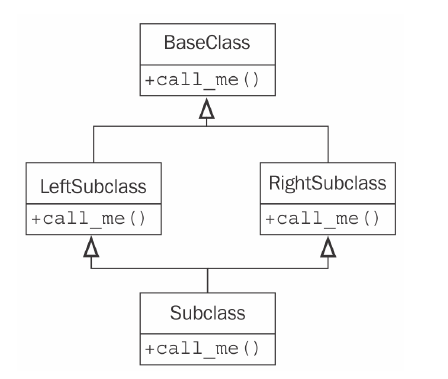

__Let's convert the diagram to code__:

In [37]:
class Baseclass:
    num_base_calls = 0
    
    def call_me(self):
        print('Calling method on Base Class')
        self.num_base_calls += 1
        
class LeftSubclass(Baseclass):
    num_left_calls = 0
    
    def call_me(self):
        Baseclass.call_me(self)
        print('Calling method on Left Subclass')
        self.num_left_calls += 1
        
class RightSubclass(Baseclass):
    num_right_calls = 0
    
    def call_me(self):
        Baseclass.call_me(self)
        print('Calling method on Right Subclass')
        self.num_right_calls += 1
        
class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0
    
    def call_me(self):
        LeftSubclass.call_me(self)
        RightSubclass.call_me(self)
        print('Calling method on Subclass')
        self.num_sub_calls += 1

In [38]:
s = Subclass()
s.call_me()

Calling method on Base Class
Calling method on Left Subclass
Calling method on Base Class
Calling method on Right Subclass
Calling method on Subclass


In [39]:
print(s.num_base_calls, s.num_left_calls, s.num_right_calls, s.num_sub_calls)

2 1 1 1


The thing to keep in mind with multiple inheritance is that we only want to
call the next method in the class hierarchy, not the parent method. In fact, that
next method may not be on a parent or ancestor of the current class. The
super keyword comes to our rescue once again. Indeed, super was originally
developed to make complicated forms of multiple inheritance possible.
Here is the same code written using super:

In [42]:
class Baseclass:
    num_base_calls = 0
    
    def call_me(self):
        print('Calling method on Base Class')
        self.num_base_calls += 1
        
class LeftSubclass(Baseclass):
    num_left_calls = 0
    
    def call_me(self):
        super().call_me()
        print('Calling method on Left Subclass')
        self.num_left_calls += 1
        
class RightSubclass(Baseclass):
    num_right_calls = 0
    
    def call_me(self):
        super().call_me()
        print('Calling method on Right Subclass')
        self.num_right_calls += 1
        
class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0
    
    def call_me(self):
        super().call_me()
        print('Calling method on Subclass')
        self.num_sub_calls += 1

We only replace the naive direct calls with calls to __super()__. The bottom Subclass only calls __super()__ once instead of making calls for both left and right.

In [43]:
s = Subclass()
s.call_me()

Calling method on Base Class
Calling method on Right Subclass
Calling method on Left Subclass
Calling method on Subclass


In [44]:
print(s.num_base_calls, s.num_left_calls, s.num_right_calls, s.num_sub_calls)

1 1 1 1


- The super() call works by calling the next class in the hierarchy. Hence. s.call_me calls LeftSubclass.call_me whose super() call calls RightSubclass.call_me whose super() call then calls the Baseclass.call_me

__Different sets of arguments__

When trying to pass different arguments to different subclasses. We dont necessarily know how the super() method is gonna initialize the subclasses so as to pass the right arguments to specific subclass as it moves up the hierarchy of classes.

- Unfortunately, the way to deal with this issue is to design for it from the beginning. We are gonna use the *Friend* class to illustrate this concept.

In [1]:
class Contact:
    all_contacts = []
    
    def __init__(self, name="", email="", **kwargs):
        super().__init__(**kwargs)
        self.name = name
        self.email = email
        self.all_contacts.append(self)
        
class AddressHolder:
    def __init__(self, street="", city="", state="", code="", **kwargs):
        super().__init__(**kwargs)
        self.street = street
        self.city = city
        self.state = state
        self.code = code
        
class Friend(Contact, AddressHolder):
    def __init__(self, phone="", **kwargs):
        super().__init__(**kwargs)
        self.phone = phone

__Polymorphism__

This concept will be explained using an audiofile. 

An _AudioFile_ object can have a play() method which is responsible for decompressing and extracting the audio before reouting it to the sound card or speakers. 

The act of playing an audio file can as simple as __audio_file.play()__.

Although different audio files have different compression algorithms. Hence, we can use inheritance with polymorphism to simplify the design. For example, _wavFile_ and _MP3File_. Each of these would have a different subclass with a __play()__ method that would be implemented differently for each file to ensure that the correct extraction procedure is followed. The _media player object_ would never need to know which subclass of _AudioFile_ it is referring to; it just calls _play()_ method and polymorphically lets the object take care of the actual details of playing.   

In [3]:
class AudioFile:
    def __init__(self, filename):
        if not filename.endswith(self.ext):
            raise Exception('Invalid file format')
            
        self.filename = filename
        
class MP3File(AudioFile):
    ext = 'mp3'
    
    def play(self):
        print('playing {} as mp3'.format(self.filename))
        
class WavFile(AudioFile):
    ext = 'wav'
    
    def play(self):
        print('playing {} as wav'.format(self.filename))
        
class OggFile(AudioFile):
    ext = 'ogg'
    
    def play(self):
        print('playing {} as ogg'.format(self.filename))

Polymorphism occurs in code above in 2 basic ways:

- Polymorphism is able to allow _AudioFile_ to access the "ext" class variable in all of its subclasses

- Polymorphism also allow for the _AudioFile_ to play different Files without knowing the files it referring to

In [4]:
ogg = OggFile('myfile.ogg')
ogg.play()

playing myfile.ogg as ogg


In [5]:
mp3 = MP3File('myfile.mp3')
mp3.play()

playing myfile.mp3 as mp3


In [6]:
not_an_mp3 = MP3File('myfile.ogg')

Exception: Invalid file format

- Python makes polymorphism seem less awesome because of duck typing

__Duck typing__ in Python allows us to use any object that provides a required behavior without forcing it to be a subclass. The following example does not extend _AudioFile_ but it can be interacted with in python using the exact same interface.

In [7]:
class FlacFile:
    def __init__(self, filename):
        if not filename.endswith('.flac'):
            raise Exception('Invalid file format')
            
        self.filename = filename
        
    def play(self):
        print('playing {} as flac'.format(self.filename))

The media player can play this object as easily as one that extends _AudioFile_

__Abstract base classes(ABCs)__

These define a set of methods and properties that a class must implement in order to be considered a duck-type instance of that class. the class can extend the ABC itself in order to be used as an instance of that class, but it must supply all the appropriate methods.

In practice, it's rarely necessary to create new abstract base classes, but we may find occasions to implement instances of existing ABCs. We'll cover
implementing ABCs first, and then briefly see how to create your own,
should you ever need to.

- Using an abstract base class

Most of the ABCs in python standard library exists in the __collections__ module. Let's inspect one of them, the _Container_ class

In [2]:
from collections.abc import Container

In [3]:
# Lets check the methods in the Container Class

Container.__abstractmethods__

frozenset({'__contains__'})

- The container only holds one methods

In [4]:
help(Container.__contains__)

Help on function __contains__ in module collections.abc:

__contains__(self, x)



In [7]:
Container.__contains__??

- This tries to check if the container holds the value used as argument

This method can be implemented by _list, str and dict_ to indicate whether or not a given value is in the data structure

In [8]:
# Lets make a container that tells whether a given value is in 
# the set of odd integers

class OddContainer:
    def __contains__(self, x):
        if not isinstance(x, int) or not x % 2:
            return False
        return True

- The OddContainer class has a duct-type instance of __Container__ class. Because it has the only method dunder __contains__ in the __Container__ class

In [9]:
from collections.abc import Container
odd_container = OddContainer()

In [10]:
isinstance(odd_container, Container)

True

In [11]:
issubclass(OddContainer, Container)

True

And that is why duck typing is way more awesome than classical
polymorphism. We can create is a relationships without the overhead of
writing the code to set up inheritance (or worse, multiple inheritance).

In [16]:
# False or False: not True or not True
# Test 1: not True or not True

True

- One cool thing about the __Container ABC__ is that any class that gets to implement it gets to use the __in__ _keyword_ for free. Infact __in__ is the syntactic sugar for __contains__ method.

In [22]:
print(1 in odd_container)
print(odd_container.__contains__(1))

True
True


In [23]:
print(2 in odd_container)
print(3 in odd_container)
print('a_string' in odd_container)

False
True
False


__Creating an abstract base class__

The following contains python's most arcane concepts

In [3]:
import abc

In [29]:
class MediaLoader(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def play(self):
        pass
    
    @abc.abstractproperty
    def ext(self):
        pass
    
    @classmethod
    def __subclasshook__(cls, C):
        if cls is MediaLoader:
            attrs = set(dir(C))
            if set(cls.__abstractmethods__) <= attrs:
                return True
            
        return NotImplemented

- The ABCMeta metaclass provides superhero(or at least superclass) abilities. __@abc.abstractmethod__ and __@abc.abstractproperty__ construct are python decorators. By marking a method or property as being abstract. We are stating that any subclass of this class must implememnt that method or supply that property to be considered proper of the class.

- __subclasshook__ method job is that _if any class supplies concrete implementations of the abstract attributes and methods, it should automatically be made a subclass of the Medialoader even though it did not inherit the Medialoader class_

- See what happened when method and property with the decorators are'nt 
 supplied

In [33]:
class Wav(MediaLoader):
    pass

In [31]:
x = Wav()

TypeError: Can't instantiate abstract class Wav with abstract methods ext, play

- See what happened when method and property with the decorators are 
 supplied

In [58]:
class Ogg(MediaLoader):
    ext = '.ogg'

    
    def play(self):
        pass

In [40]:
x = Ogg() # Works fine as the method and property in the superclass are 
          # supplied

- _Wav_ class fails instantiate as abstract attributes and methods are not implemented . However, _Ogg_ instantiates well as the attributes and methods are supplied.

More common object-oriented languages have a clear separation between
the interface and the implementation of a class. For example, some
languages provide an explicit interface keyword that allows us to define the
methods that a class must have without any implementation. In such an
environment, an abstract class is one that provides both an interface and a
concrete implementation of some, but not all, methods. Any class can
explicitly state that it implements a given interface.
Python's ABCs help to supply the functionality of interfaces without
compromising on the benefits of duck typing.

In [44]:
len(set(dir(MediaLoader.__abstractmethods__)))

42

In [45]:
len(set(dir(MediaLoader)))

30

In [46]:
len(set(dir(Ogg)))

30

In [48]:
issubclass(Ogg, MediaLoader)

True

In [59]:
set(dir(MediaLoader.__abstractmethods__)) <= set(dir(Ogg))

False

__Case Study__

- Creating an automated grading system for programming assignement
- the system shoulf have an interface for course writers to create assignments and should give useful error if it does not fulfill that interface
- the writers need to be able to supply lessons and write custom answer checking code to ensure students got the answer right. They should also have access to students name to make content friendlier.
- The grader should be able to keep track of which assignment the studentr is working on. Atudent might m ake several attempts at an assignment before they get it right. We wanna keep track of the attempts so the course authors can improve the content of the more difficult lessons.

Lets define the interface that course authors will need to use. ideally it contains minimal code besides lesson content and answer checking code

In [14]:
class IntroToPython:
    def lesson(self):
        return f'''Hello {self.student}. define two variables,
        an integer named a with value 1 and a string named b with value
        "hello"'''
    
    def check(self, code):
        return code == "a = 1\nb = 'hello'"

Lets make an ABC that defines this interface as follows:

In [15]:
class Assignment(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def lesson(self, student):
        pass
    
    @abc.abstractmethod
    def check(self, code):
        pass
    
    @classmethod
    def __subclasshook__(cls, C):
        if cls is Assignment:
            attrs = set(dir(C))
            if set(cls.__abstractmethods__) <= attrs:
                return True
            
        return NotImplemented

- Lets check if the IntroToPython fulfills this interface

In [16]:
issubclass(IntroToPython, Assignment)

True

- We can extend the Assignment class if we prefer as seen below

In [17]:
class Statistics(Assignment):
    def lesson(self):
        return (
            "Good work so far, "
            + self.student
            + ". Now calculate the average of the numbers "
            + " 1, 5, 18, -3 and assign to a variable named 'avg'"
        )
    
    def check(self, code):
        import statistics
        
        code = "import statistics\n" + code
        
        local_vars = {}
        global_vars = {}
        exec(code, global_vars, local_vars)
        
        return local_vars.get('avg') == statistics.mean([1, 5, 18, -3])

- Next we create a class that manages how many attempts the student has made at a given assignment

In [18]:
class AssignmentGrader:
    def __init__(self, student, AssignmentClass):
        self.assignment = AssignmentClass()
        self.assignment.student = student
        self.attempts = 0
        self.correct_attempts = 0
        
    def check(self, code):
        self.attempts += 1
        result = self.assignment.check(code)
        if result:
            self.correct_attempts += 1
            
        return result
    
    def lesson(self):
        return self.assignment.lesson()

This class uses composition instead of inheritance. At first glance, it may be nice to use _Assignment_ as superclass. That would eliminate the annoying _lesson_ method. It is also possible to put the logic in the _Assignment_ ABC. Lastly It would also be possible to have ABC inherit from this _AssignmentGrader_ class. This is the recommended approach, though this will defy our need to make the interface as simple as possible. 

__Finally,__ let us put together the _Grader_ class, which is responsible for managing which assignments are available and which one each student is currently working on. The most interesting part is the register method.

In [19]:
import uuid

In [20]:
uuid?

In [24]:
class Grader:
    def __init__(self):
        self.student_graders = {}
        self.assignment_classes = {}
        
    def register(self, assignment_classes):
        if not issubclass(assignment_classes, Assignment):
            raise RuntimeError(
                "Your class does not have the right methods"
            )
            
        id_ = uuid.uuid4()
        self.assignment_classes[id_] = assignment_classes
        
        return id_
    
    def start_assignment(self, student, id_):
        self.student_graders[student] = \
                        AssignmentGrader(student, self.assignment_classes[id_])
        
    # Write proxy methods that get the lesson or check the code for whatever
    # assignment the student is currently working on:
    
    def get_lesson(self, student):
        assignment = self.student_graders[student]
        return assignment.lesson()
    
    def check_assignment(self, student, code):
        assignment = self.student_graders[student]
        return assignment.check(code)
    
    # Finally, we give a method, that gives summary of a student's current 
    # assignment progress. It looks up the assignment object and creates a
    # formatted string with all the information we have about that student
    
    def assignment_summary(self, student):
        grader = self.student_graders[student]
        return f"""
        {student}'s attempts at {grader.assignment.__class__.__name__}':
        
        attempts: {grader.attempts}
        correct: {grader.correct_attempts}
        
        passed: {grader.correct_attempts > 0}
        """

- Presumably, another object would then place the id_ from Grader class in a course syllabus of some sorts so students do the assignments in order. but we wont be doing this part of the project.

__Next up__, we have _start_assignment_ function. which allows a student to start working on an assignment given the ID of that assignment.

__Here's a bit of test code that shows all these objects connected together:__

In [25]:
grader = Grader()
itp_id = grader.register(IntroToPython)
stat_id = grader.register(Statistics)

grader.start_assignment("Tammy", itp_id)
print("Tammy's lessom:", grader.get_lesson('Tammy'))
print(
    "Tammy's check:",
    grader.check_assignment("Tammy", "a = 1 ; b = 'hello'"),
)

print(
    "Tammy's other check:",
    grader.check_assignment("Tammy", "a = 1\nb = 'hello'"),
)

print(grader.assignment_summary("Tammy"))

Tammy's lessom: Hello Tammy. define two variables,
        an integer named a with value 1 and a string named b with value
        "hello"
Tammy's check: False
Tammy's other check: True

        Tammy's attempts at IntroToPython':
        
        attempts: 2
        correct: 1
        
        passed: True
        
